In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Introduction
### Question
Can we determine, using stats, which colleges supply the NBA with the best players and which teams are the best at drafting?
### Database
The NBA Draft dataset contains information about each NBA player who was drafted between the years of 1989 and 2021. It gives information about their pick (team, pick number), a bit of background on the player (college, name), and stats about the player's career in the NBA (years active, games played, etc.). The dataset can be found here at https://www.kaggle.com/datasets/mattop/nba-draft-basketball-player-data-19892021.

In [2]:
nba_draft = pd.read_csv('nbaplayersdraft.csv')
nba_draft.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [3]:
nba_draft.columns

Index(['id', 'year', 'rank', 'overall_pick', 'team', 'player', 'college',
       'years_active', 'games', 'minutes_played', 'points', 'total_rebounds',
       'assists', 'field_goal_percentage', '3_point_percentage',
       'free_throw_percentage', 'average_minutes_played', 'points_per_game',
       'average_total_rebounds', 'average_assists', 'win_shares',
       'win_shares_per_48_minutes', 'box_plus_minus',
       'value_over_replacement'],
      dtype='object')

## Exploratory Data Analysis
Here, we can see how many NBA draftees colleges have between 1989 and 2021. We see that Kentucky has the most at 58 drafted players, with Duke following closely behind with 57.

In [9]:
nba_draft.groupby('college')['overall_pick'].count().sort_values(ascending = False)

college
Kentucky                                  58
Duke                                      57
Arizona                                   43
UNC                                       43
UCLA                                      42
                                          ..
Okaloosa-Walton Community College          1
College of the Sequoias                    1
Northwestern Oklahoma State University     1
Northwestern                               1
Yale                                       1
Name: overall_pick, Length: 237, dtype: int64

Here, we can see which colleges had players with the highest average overall draft picks. The college with the highest average draft pick is the University of the Pacific, with an average of 1.

In [8]:
nba_draft.groupby('college')['overall_pick'].mean().sort_values(ascending = True)

college
University of the Pacific                1.0
Central Michigan University              6.0
Miami University                         6.0
Davidson                                 7.0
University of Hartford                   8.0
                                        ... 
Southern Illinois                       56.0
UT Arlington                            57.0
University of Tennessee at Martin       58.0
Central Connecticut State University    58.0
Yale                                    58.0
Name: overall_pick, Length: 237, dtype: float64

In the below cells, we can see that the top 5 colleges in terms of average draft pick all ahve only one player drafted in the time period. 

In [11]:
nba_draft[nba_draft['college'] == 'University of the Pacific']

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
497,498,1998,1,1,LAC,Michael Olowokandi,University of the Pacific,9.0,500.0,13129.0,...,NaN,0.597,26.3,8.3,6.8,0.7,2.5,0.009,-4.6,-8.5


In [12]:
nba_draft[nba_draft['college'] == 'Central Michigan University']

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
790,791,2003,6,6,LAC,Chris Kaman,Central Michigan University,13.0,735.0,19642.0,...,0.042,0.743,26.7,11.2,7.6,1.3,24.6,0.06,-1.9,0.4


In [13]:
nba_draft[nba_draft['college'] == 'Miami University']

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
560,561,1999,6,6,MIN,Wally Szczerbiak,Miami University,10.0,651.0,20052.0,...,0.406,0.86,30.8,14.1,4.0,2.4,53.3,0.127,0.7,13.6


In [14]:
nba_draft[nba_draft['college'] == 'Davidson']

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1148,1149,2009,7,7,GSW,Stephen Curry,Davidson,13.0,826.0,28361.0,...,0.428,0.908,34.3,24.3,4.6,6.5,120.2,0.203,6.5,60.9


In [42]:
nba_draft[nba_draft['college'] == 'University of Hartford']

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
223,224,1993,8,8,MIL,Vin Baker,University of Hartford,13.0,791.0,25737.0,...,0.215,0.638,32.5,15.0,7.4,1.9,47.0,0.088,-1.2,5.3


Below, we can see which teams had the highest average picks, meaning during the time period, they were not doing so well, leading to higher draft picks. We can see that the Charlotte Bobcats, Charlotte Hornets, and New Orleans Hornets franchises had the highest average draft picks. 

In [16]:
nba_draft.groupby('team')['overall_pick'].mean().sort_values(ascending = True)

team
CHA    21.250000
CHH    22.666667
NOH    23.714286
CLE    24.672727
LAC    24.775862
VAN    24.923077
NOK    25.200000
ORL    25.323529
NJN    25.619048
TOR    26.186047
WSB    26.250000
WAS    27.395349
MEM    27.555556
CHI    27.720000
GSW    27.727273
SAC    27.904110
MIN    27.935065
NYK    28.094340
OKC    28.740741
BOS    28.973333
MIL    29.000000
DEN    29.750000
ATL    29.900000
HOU    30.409836
CHO    30.812500
POR    30.909091
DET    30.953846
MIA    31.346154
PHI    31.888889
PHO    32.000000
SEA    32.777778
DAL    33.419355
LAL    33.491228
UTA    33.652778
IND    33.701754
BRK    36.578947
NOP    36.833333
SAS    39.177419
Name: overall_pick, dtype: float64

In [17]:
first_rounders = nba_draft[nba_draft['overall_pick'] < 31]
first_rounders

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,1888,2021,26,26,DEN,Bones Hyland,VCU,1.0,69.0,1310.0,...,0.366,0.856,19.0,10.1,2.7,2.8,2.4,0.088,-0.4,0.5
1888,1889,2021,27,27,BRK,Cam Thomas,LSU,1.0,67.0,1176.0,...,0.270,0.829,17.6,8.5,2.4,1.2,0.8,0.033,-3.4,-0.4
1889,1890,2021,28,28,PHI,Jaden Springer,Tennessee,1.0,2.0,6.0,...,NaN,NaN,3.0,1.0,1.0,0.0,0.0,0.138,17.1,0.0
1890,1891,2021,29,29,PHO,Day'Ron Sharpe,UNC,1.0,32.0,391.0,...,0.286,0.585,12.2,6.2,5.0,0.5,1.2,0.152,-2.8,-0.1


If we break it down more, and narrow it only to first round draft picks (as some teams may have multiple picks from trades which may lead to skewed results in the above query), we can see that the Vancouver Grizzlies, New Orleans Pelicans, and Charlotte Bobcats have the highest average first round picks.

In [18]:
first_rounders.groupby('team')['overall_pick'].mean().sort_values(ascending = True)

team
VAN     5.857143
NOP     7.500000
CHA     9.846154
WSB    11.285714
CHO    11.285714
WAS    11.550000
SAC    11.944444
TOR    12.192308
MIN    12.425000
CLE    12.718750
LAC    12.764706
NOH    12.888889
MIL    13.129032
NOK    13.333333
PHI    13.457143
ORL    13.700000
GSW    14.555556
DEN    14.575758
CHH    14.705882
NJN    15.115385
SEA    15.285714
ATL    15.325000
DET    15.531250
DAL    16.423077
BOS    16.477273
MEM    16.500000
CHI    16.571429
NYK    16.935484
IND    17.185185
MIA    17.200000
PHO    17.769231
HOU    17.843750
POR    18.272727
UTA    19.648649
LAL    19.666667
OKC    19.833333
SAS    23.037037
BRK    24.333333
Name: overall_pick, dtype: float64

Here, we can see the breakdown of draft classes by average winshares per 48 minutes. Win share is a measure that is given to players based on their offensive statistics, defensive statistics, and playing time. More win shares generally means the player contributed more to the team's wins. The 1991 and 2015 drafts have the highest average winshares across the board, meaning the draft classes were more well rounded and more players were able to contribute.

C:\Users\Justin Chu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Average Winshares per 48 Minutes'),
 Text(0.5, 1.0, 'Average Winshares per 48 Minutes of Players Drafted that Year')]

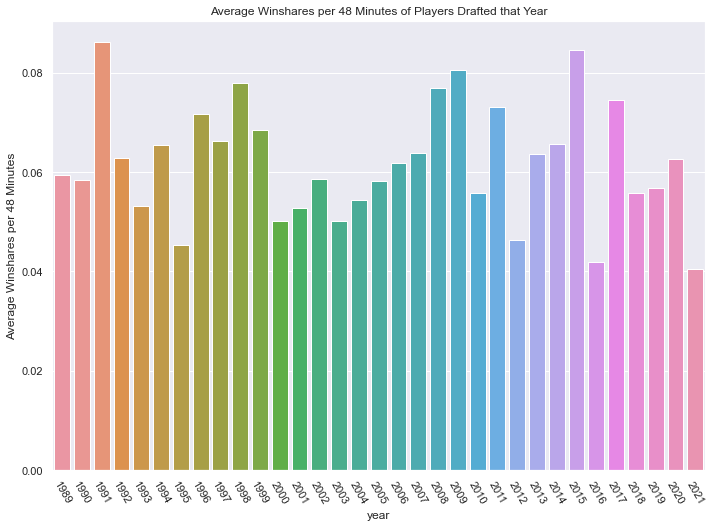

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
winshare_by_year = nba_draft.groupby('year')['win_shares_per_48_minutes'].mean()
ws_bar = sns.barplot(winshare_by_year.index, winshare_by_year.values)
ws_bar.set_xticklabels(ws_bar.get_xticklabels(), rotation = 300)
ws_bar.set(ylabel = 'Average Winshares per 48 Minutes', title = 'Average Winshares per 48 Minutes of Players Drafted that Year')

Here, we can see the average value over replacement of each team's draft picks. Value over replacement is the box score estimate of the points per 100 possessions, that the player's team has, that the player contributed to compared to the replacement level player. The New Orleans Hornets, Charlotte Hornets, and Seattle Supersonics have had the highest value over replacement with their draft picks.

C:\Users\Justin Chu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Average Value Over Replacement'),
 Text(0.5, 1.0, 'Average Value Over Replacement of Draft Picks by Team')]

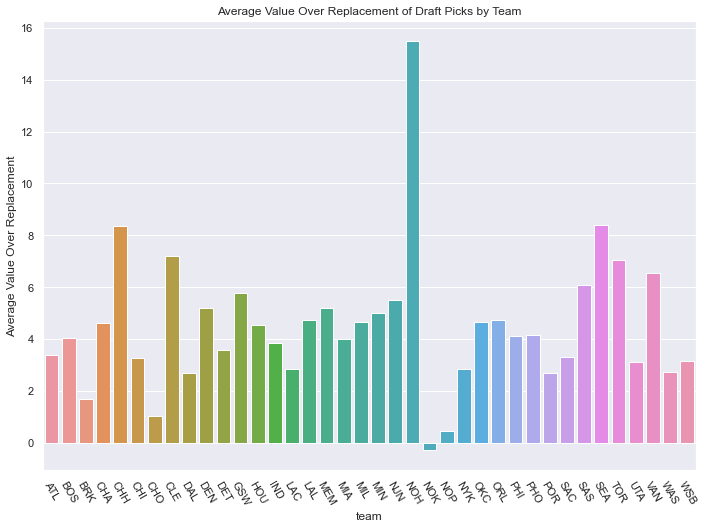

In [45]:
valuerep_by_team = nba_draft.groupby('team')['value_over_replacement'].mean()
val_bar = sns.barplot(valuerep_by_team.index, valuerep_by_team.values)
val_bar.set_xticklabels(val_bar.get_xticklabels(), rotation = 300)
val_bar.set(ylabel = 'Average Value Over Replacement', 
           title = 'Average Value Over Replacement of Draft Picks by Team')

If we look at only the first round draft picks of the teams, we can see the players who are more likely to play more and see their value over replacement. With the first rounders, the teams who have the highest average value over replacement are the New Orleans Hornets, Seattle Supersonics, and the Charlotte Hornets. 

C:\Users\Justin Chu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Average Value over Replacement'),
 Text(0.5, 1.0, 'Average Value Over Replacement of 1st Round Draft Picks by Team')]

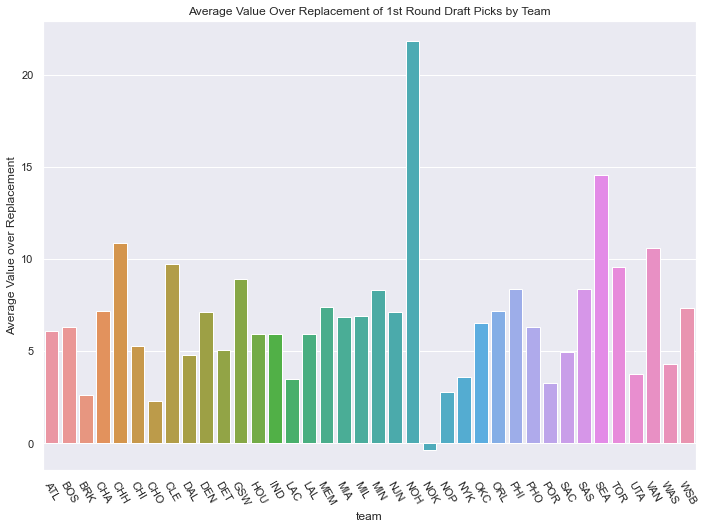

In [50]:
firstrd_valrep = first_rounders.groupby('team')['value_over_replacement'].mean()
first_val_bar = sns.barplot(firstrd_valrep.index, firstrd_valrep.values)
first_val_bar.set_xticklabels(first_val_bar.get_xticklabels(), rotation = 300)
first_val_bar.set(ylabel = 'Average Value over Replacement',
                 title = 'Average Value Over Replacement of 1st Round Draft Picks by Team')

If we look closely at the only team who has an average negative value over replaceemnt, we can see that the team labeled "NOK" has only three draft picks from 2006-2007. With a little background knowledge, we can determine why there are so little first rounders and such a short time period. After Hurricane Katrina hit New Orleans, the New Orleans Hornets had to temporarily relocate to Oklahoma City, and shortly after the city had recovered, returned to New Orleans.

In [49]:
first_rounders[first_rounders['team']=='NOK']

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
973,974,2006,12,12,NOK,Hilton Armstrong,UConn,6.0,292.0,3378.0,...,0.286,0.582,11.6,3.0,2.6,0.3,3.9,0.055,-4.1,-1.8
976,977,2006,15,15,NOK,Cedric Simmons,NC State,3.0,75.0,705.0,...,NaN,0.390,9.4,2.2,1.9,0.2,0.1,0.005,-5.0,-0.5
1034,1035,2007,13,13,NOK,Julian Wright,Kansas,4.0,231.0,3049.0,...,0.262,0.584,13.2,3.9,2.3,0.8,3.9,0.061,-0.5,1.2


If we look at the Seattle Supersonics, who have one of the highest value over replacement, we can see why it is the highest. There are only 21 players who were drafted in the first round in the time period ny the Supersonics and among those 21 players, there are 7 players who had quite strong careers, with Kemp, Payton, Christie, Maggette, Durant, Westbrook, and Ibaka. Also, most of the other teams have players who are new in the league, meaning they don't have as much value over their replacement.

In [55]:
first_rounders[first_rounders['team']=='SEA']

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
15,16,1989,16,16,SEA,Dana Barros,Boston College,14.0,850.0,19480.0,...,0.411,0.858,22.9,10.5,1.9,3.3,49.6,0.122,1.7,18.1
16,17,1989,17,17,SEA,Shawn Kemp,Trinity Valley CC,14.0,1051.0,29293.0,...,0.277,0.741,27.9,14.6,8.4,1.6,89.5,0.147,0.6,19.4
55,56,1990,2,2,SEA,Gary Payton,Oregon State,17.0,1335.0,47117.0,...,0.317,0.729,35.3,16.3,3.9,6.7,145.5,0.148,3.3,62.5
121,122,1991,14,14,SEA,Rich King,Nebraska,4.0,72.0,309.0,...,0.000,0.662,4.3,1.9,1.0,0.3,0.2,0.036,-6.9,-0.4
178,179,1992,17,17,SEA,Doug Christie,Pepperdine,15.0,827.0,26079.0,...,0.354,0.821,31.5,11.2,4.1,3.6,55.7,0.102,1.1,20.7
238,239,1993,23,23,SEA,Ervin Johnson,New Orleans,13.0,845.0,16989.0,...,0.200,0.605,20.1,4.1,6.1,0.5,37.8,0.107,-1.4,2.6
280,281,1994,11,11,SEA,Carlos Rogers,Tennessee State,8.0,298.0,5654.0,...,0.258,0.562,19.0,7.4,4.3,0.6,11.1,0.095,-1.0,1.5
349,350,1995,26,26,SEA,Sherell Ford,University of Illinois at Chicago,1.0,28.0,139.0,...,0.160,0.765,5.0,3.2,0.9,0.2,0.4,0.124,-5.2,-0.1
462,463,1997,23,23,SEA,Bobby Jackson,Minnesota,12.0,755.0,16790.0,...,0.354,0.793,22.2,9.7,3.1,2.6,31.4,0.090,0.4,10.0
523,524,1998,27,27,SEA,Vladimir Stepania,NaN,6.0,270.0,3726.0,...,0.133,0.536,13.8,4.1,4.4,0.3,5.2,0.067,-3.3,-1.2


Similar to the Seattle Supersonics, the New Orleans Hornets, who have the highest value over replacement, are no longer a team, as the Hornets moved back to Charlotte and New Orleans team became the Pelicans. They also only have 9 first round picks in the time it was a team and two players, Chris Paul and Anthony Davis, pull up the average.

In [56]:
first_rounders[first_rounders['team'] == 'NOH']

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
802,803,2003,18,18,NOH,David West,Xavier,15.0,1034.0,29144.0,...,0.265,0.817,28.2,13.6,6.4,2.2,85.9,0.141,1.7,27.6
860,861,2004,18,18,NOH,J.R. Smith,NaN,16.0,977.0,26275.0,...,0.373,0.733,26.9,12.4,3.1,2.1,46.3,0.084,0.2,14.7
905,906,2005,4,4,NOH,Chris Paul,Wake Forest,17.0,1155.0,39896.0,...,0.369,0.871,34.5,18.1,4.5,9.5,198.9,0.239,7.3,93.7
1108,1109,2008,27,27,NOH,Darrell Arthur,Kansas,9.0,503.0,8945.0,...,0.352,0.765,17.8,6.5,3.5,0.8,12.3,0.066,-2.2,-0.4
1162,1163,2009,21,21,NOH,Darren Collison,UCLA,11.0,711.0,20833.0,...,0.394,0.853,29.3,12.5,2.7,5.0,49.9,0.115,0.5,13.4
1212,1213,2010,11,11,NOH,Cole Aldrich,Kansas,8.0,339.0,3389.0,...,NaN,0.738,10.0,3.1,3.3,0.5,9.6,0.135,0.1,1.8
1322,1323,2012,1,1,NOH,Anthony Davis,Kentucky,10.0,604.0,20805.0,...,0.303,0.794,34.4,23.8,10.2,2.3,91.3,0.211,6.0,42.1
1331,1332,2012,10,10,NOH,Austin Rivers,Duke,10.0,655.0,15842.0,...,0.349,0.649,24.2,8.8,2.1,2.2,13.9,0.042,-3.1,-4.2
1387,1388,2013,6,6,NOH,Nerlens Noel,Kentucky,8.0,450.0,10086.0,...,0.154,0.655,22.4,7.3,6.2,1.1,28.3,0.134,0.9,7.5


If we look at the colleges who have supplied the most valuable players to their team compared to their replacements, we can see that the 4 colleges with the highest value over replacement are Davidson, Santa Clara, Wake Forest, and Weber State.

In [61]:
nba_draft.groupby('college')['value_over_replacement'].mean().sort_values(ascending = False).dropna()

college
Davidson                      60.900000
Santa Clara                   48.200000
Wake Forest                   21.927273
Weber State                   21.850000
Trinity Valley CC             19.400000
                                ...    
Rider University              -2.400000
Florida A&M                   -3.500000
Cleveland State University    -4.100000
Wright State University       -5.900000
University of the Pacific     -8.500000
Name: value_over_replacement, Length: 219, dtype: float64

We can then take those 4 colleges and see the number of players each college have had drafted. We can see that Davidson's is so high because the only player that was drafted in that time frame is Stephen Curry. The same can be seen with Santa Clara and Steve Nash. Weber State is heavily swung by one player, Damian Lillard.

In [66]:
top4 = ['Davidson', 'Santa Clara', 'Wake Forest', 'Weber State']
nba_draft[nba_draft['college'].isin(top4)]

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
206,207,1992,45,45,SEA,Chris King,Wake Forest,3.0,103.0,2058.0,...,0.383,0.633,20.0,6.7,3.0,1.1,1.0,0.023,-2.8,-0.4
224,225,1993,9,9,DEN,Rodney Rogers,Wake Forest,12.0,866.0,21873.0,...,0.347,0.690,25.3,10.9,4.5,2.0,38.8,0.085,-0.3,9.7
342,343,1995,19,19,DET,Randolph Childress,Wake Forest,2.0,51.0,405.0,...,0.273,0.800,7.9,2.4,0.5,1.0,-0.2,-0.026,-5.7,-0.4
396,397,1996,15,15,PHO,Steve Nash,Santa Clara,18.0,1217.0,38069.0,...,0.428,0.904,31.3,14.3,3.0,8.5,129.7,0.164,3.0,48.2
440,441,1997,1,1,SAS,Tim Duncan,Wake Forest,19.0,1392.0,47368.0,...,0.179,0.696,34.0,19.0,10.8,3.0,206.4,0.209,5.6,91.1
776,777,2002,50,50,BOS,Darius Songaila,Wake Forest,8.0,495.0,9229.0,...,0.158,0.844,18.6,6.9,3.4,1.2,15.9,0.083,-2.1,-0.2
813,814,2003,29,29,DAL,Josh Howard,Wake Forest,10.0,507.0,15350.0,...,0.332,0.770,30.3,14.3,5.7,1.6,38.0,0.119,0.6,10.0
905,906,2005,4,4,NOH,Chris Paul,Wake Forest,17.0,1155.0,39896.0,...,0.369,0.871,34.5,18.1,4.5,9.5,198.9,0.239,7.3,93.7
1148,1149,2009,7,7,GSW,Stephen Curry,Davidson,13.0,826.0,28361.0,...,0.428,0.908,34.3,24.3,4.6,6.5,120.2,0.203,6.5,60.9
1157,1158,2009,16,16,CHI,James Johnson,Wake Forest,13.0,747.0,15315.0,...,0.302,0.679,20.5,7.7,3.6,2.1,27.5,0.086,0.5,9.5


## Conclusion
According to the Highest Value over Replacement metric, we have determined that Wake Forest has supplied the NBA with the best draftees on a consistent basis (although it is a smaller sample size compared to schools like Kentucky, UCLA, and Duke and is heavily skewed by Tim Duncan and Chris Paul). Using the same metric, we have also determined that the Hornets (both when they were in New Orleans amd in Charlotte) and the Supersonics ahve drafted the best players in terms of impact to the teams they play for. At the end of the day, every player and front office is different and as interesting as these statistics are, they do not paint the whole picture of certain colleges and teams in terms of their NBA draft picks. 